In [1]:
import os
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
files = os.listdir("../data/raw")

In [3]:
len(files)

49

In [4]:
df = pd.DataFrame()
for i, file in enumerate(files):
    if i == 0:
        temp_df = pd.read_csv(f"../data/raw/{file}")
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].replace(".", np.NaN)
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].astype(float)
        temp_df["DATE"] = pd.to_datetime(temp_df["DATE"])
        temp_df.set_index("DATE", inplace=True)
        temp_df = temp_df.resample('M').mean()
        temp_df.reset_index(inplace=True)
        df = temp_df
    else:
        temp_df = pd.read_csv(f"../data/raw/{file}")
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].replace(".", np.NaN)
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].astype(float)
        temp_df["DATE"] = pd.to_datetime(temp_df["DATE"])
        temp_df.set_index("DATE", inplace=True)
        temp_df = temp_df.resample('M').mean()
        temp_df.reset_index(inplace=True)
        df = pd.merge(df, temp_df, how="left")

In [5]:
df.fillna(method="ffill", inplace=True)
# df.fillna(method="bfill", inplace=True)

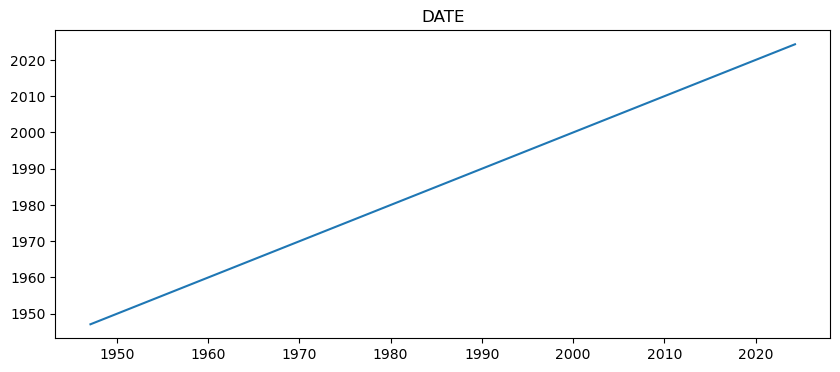

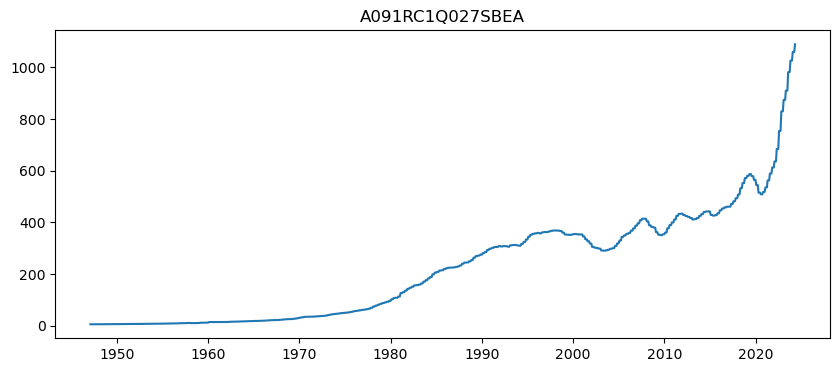

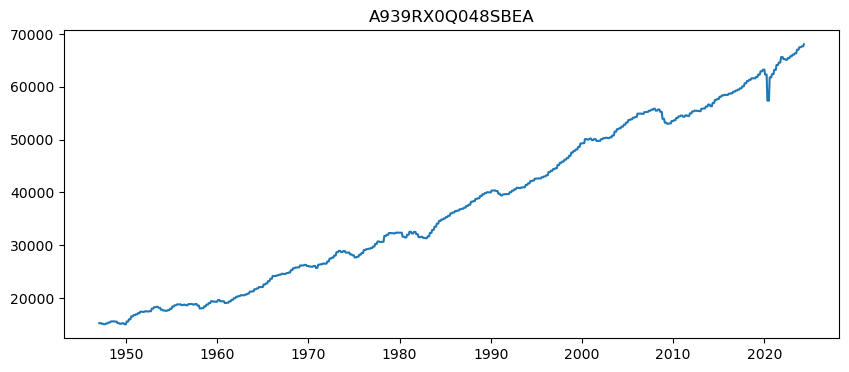

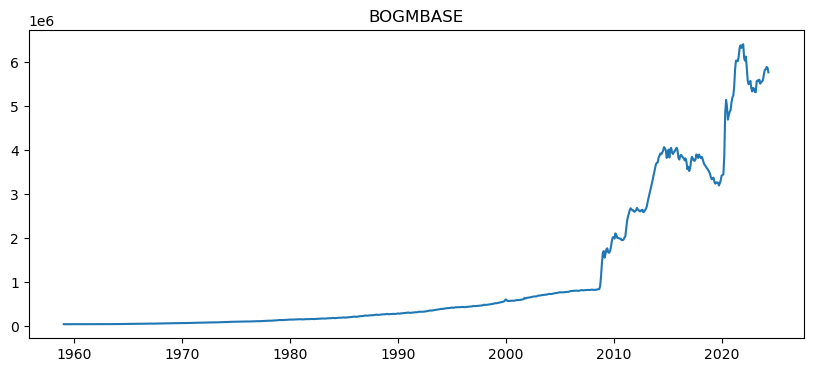

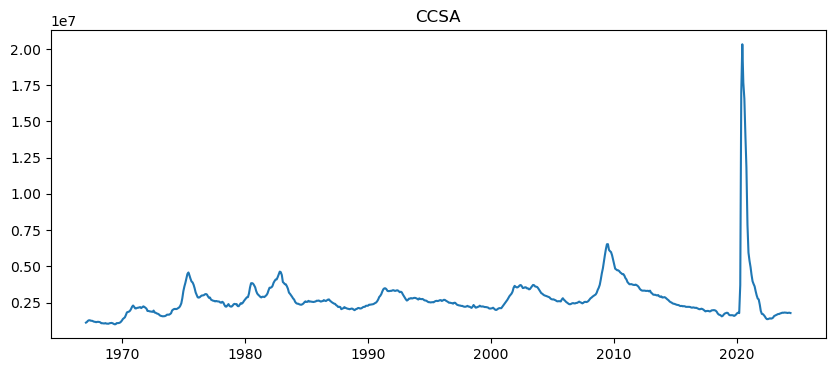

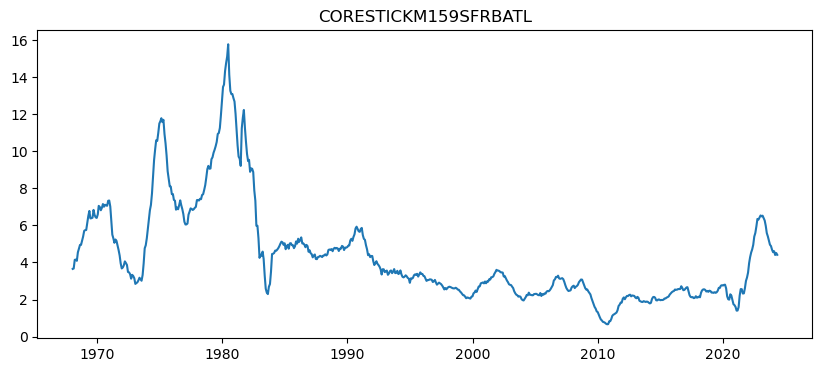

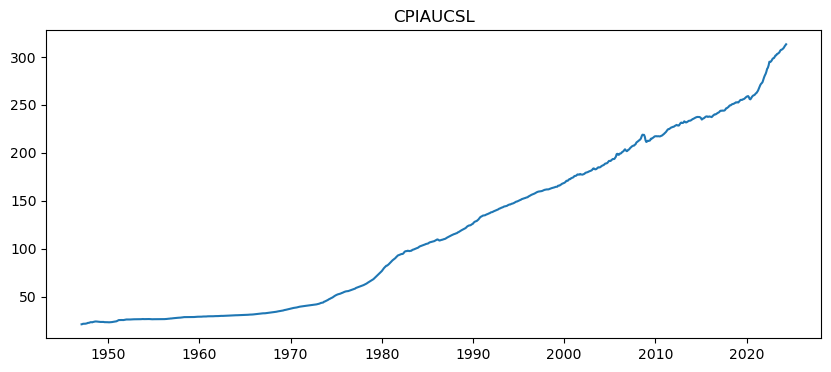

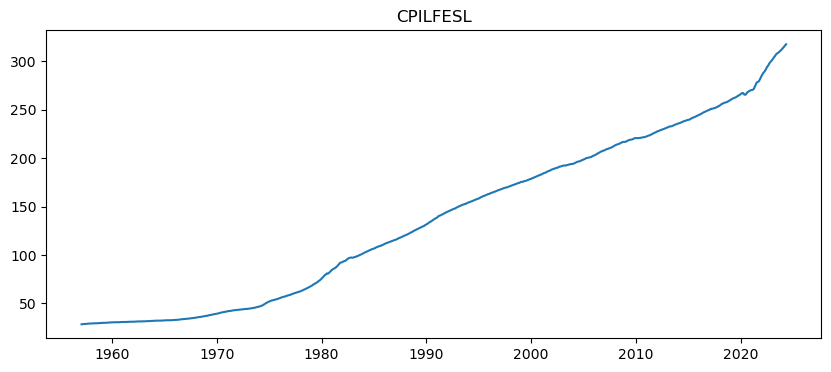

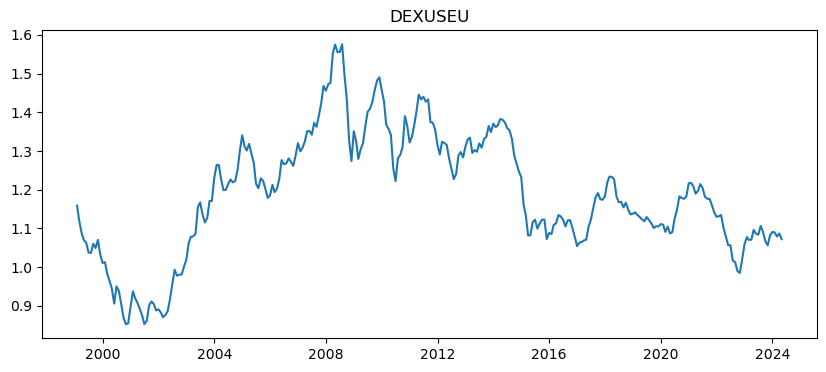

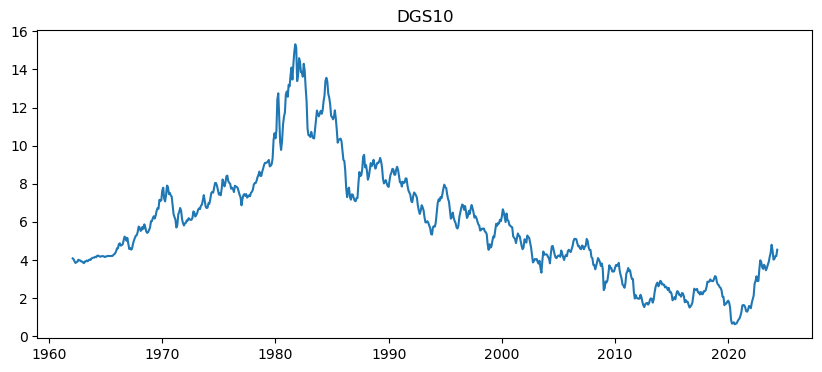

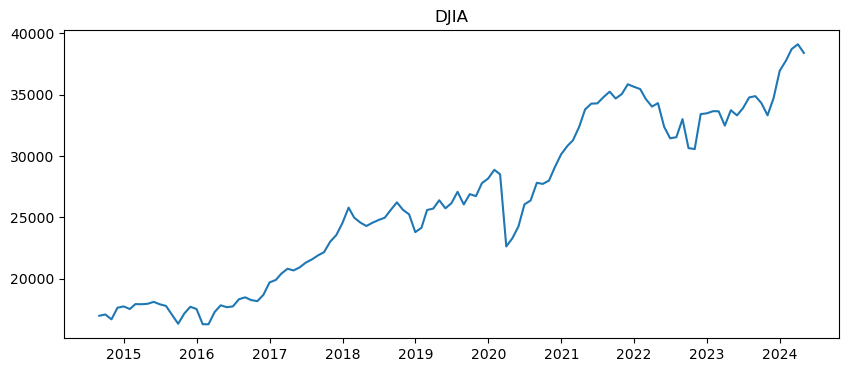

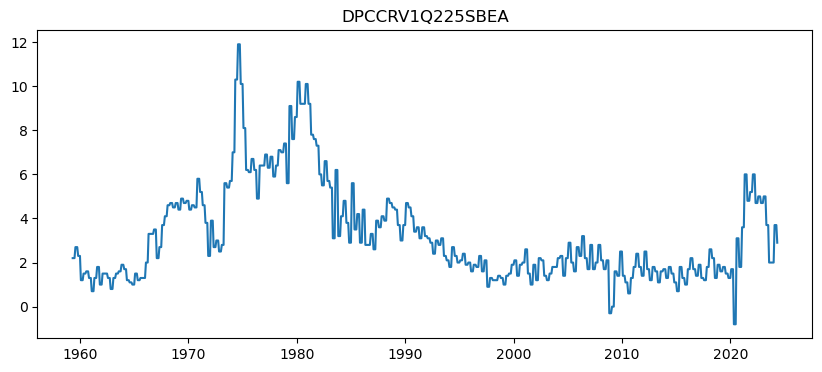

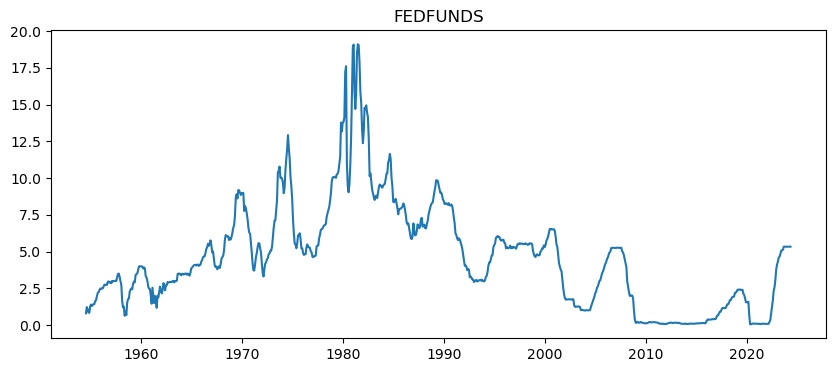

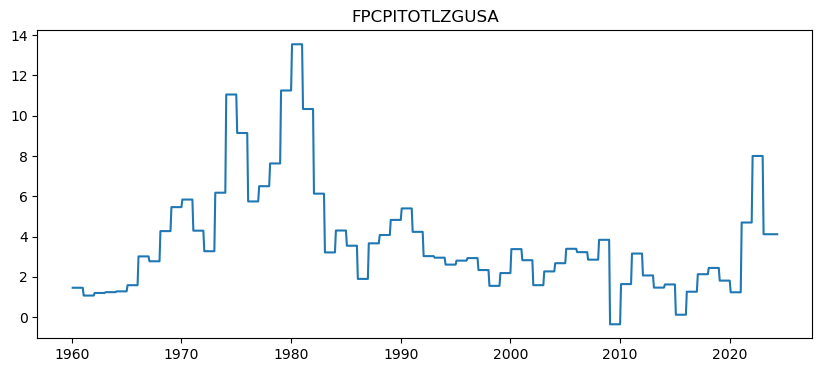

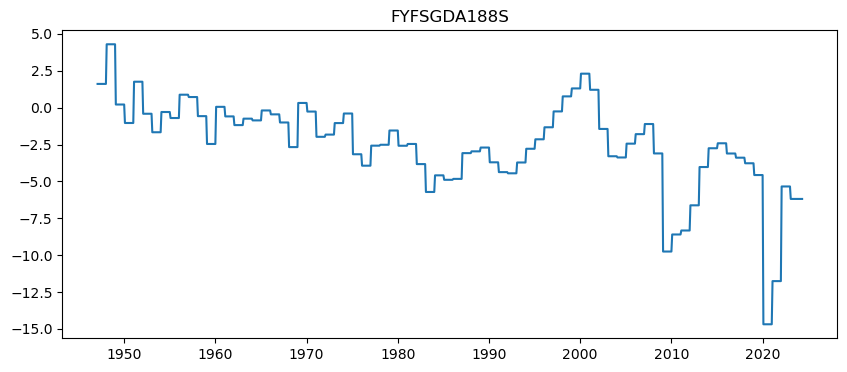

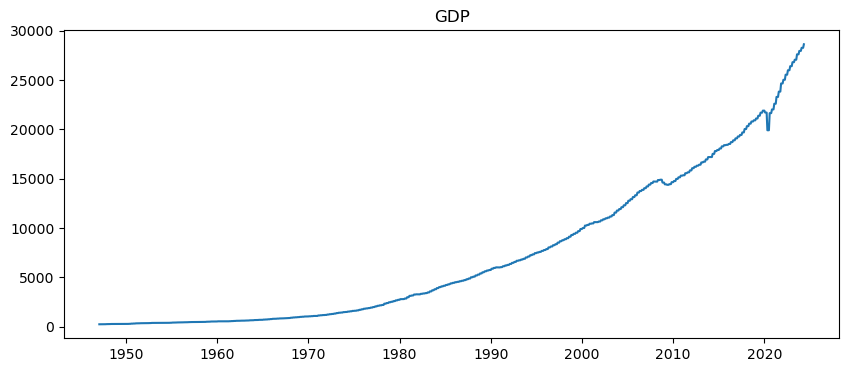

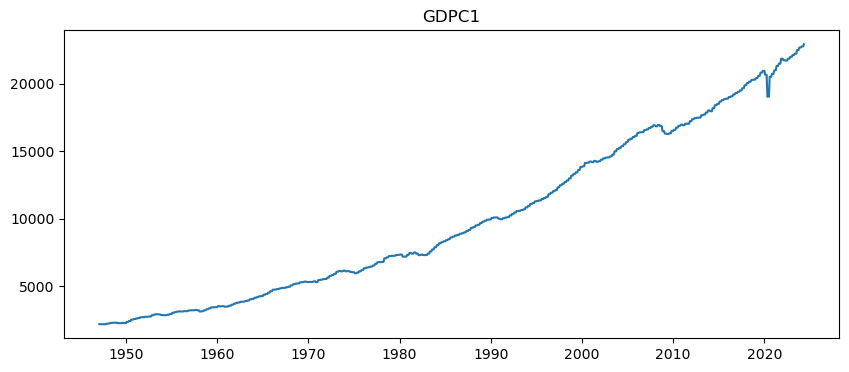

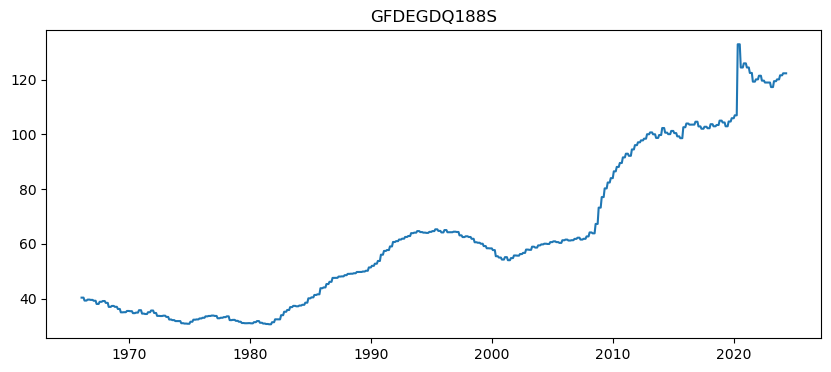

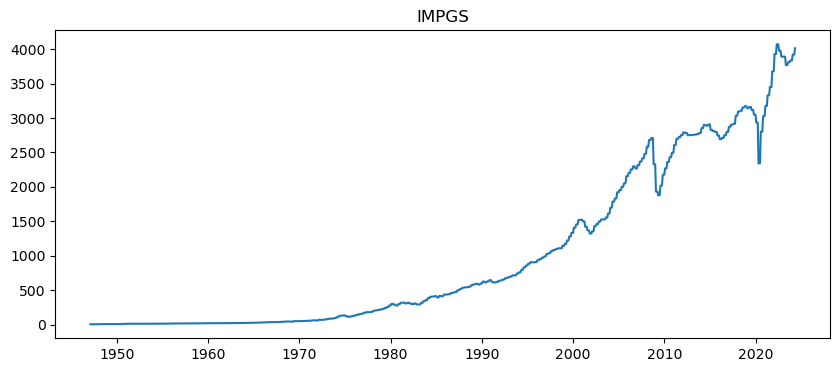

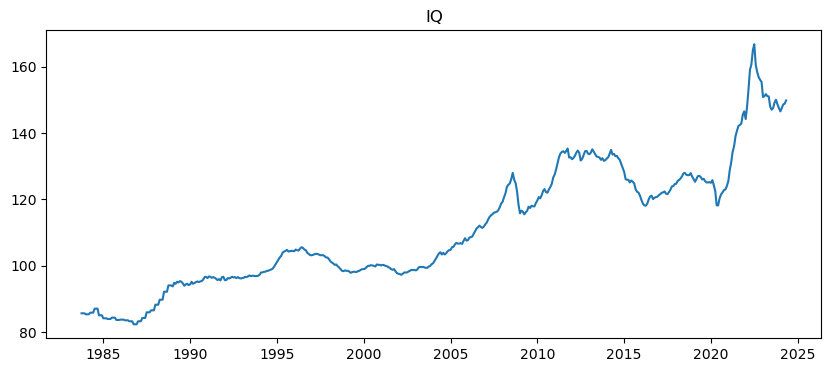

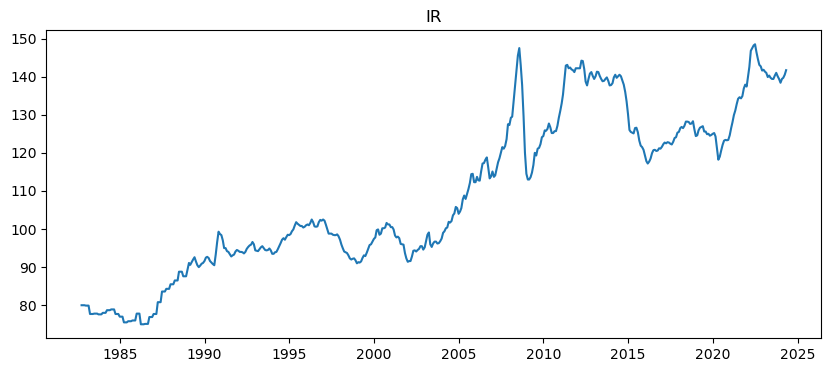

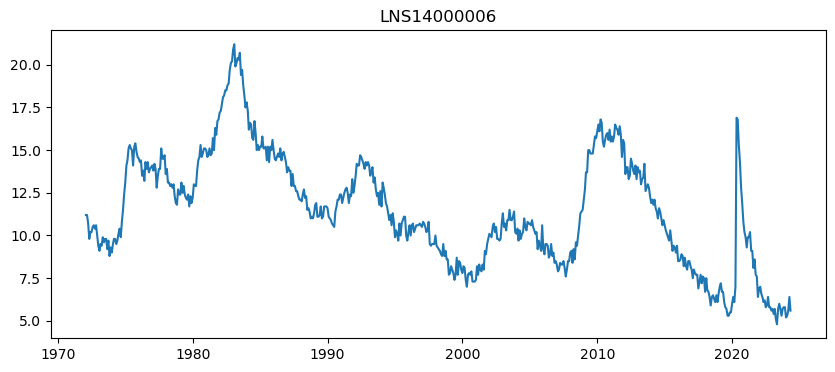

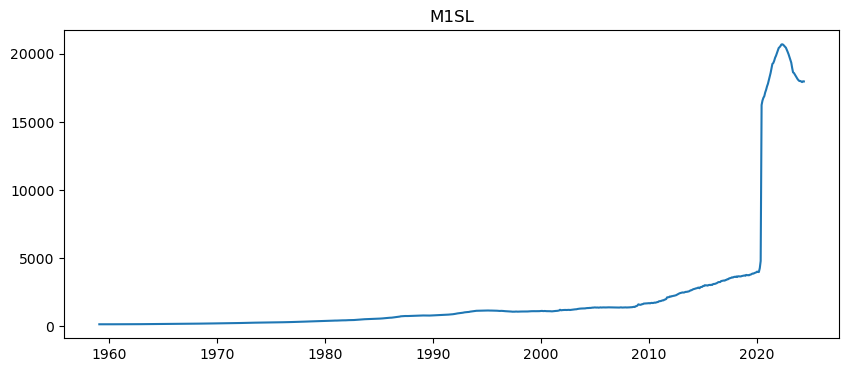

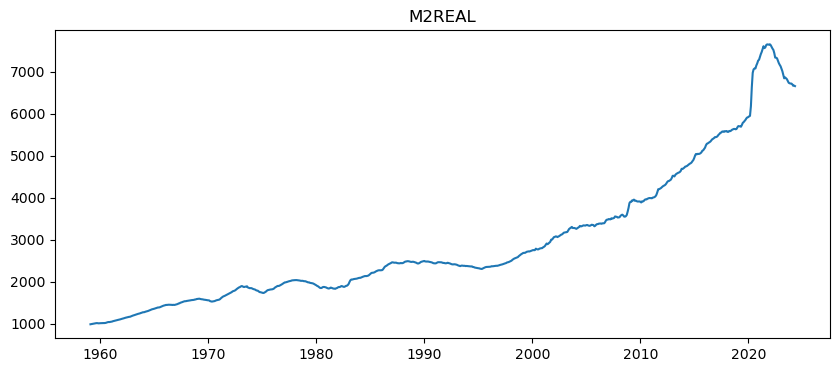

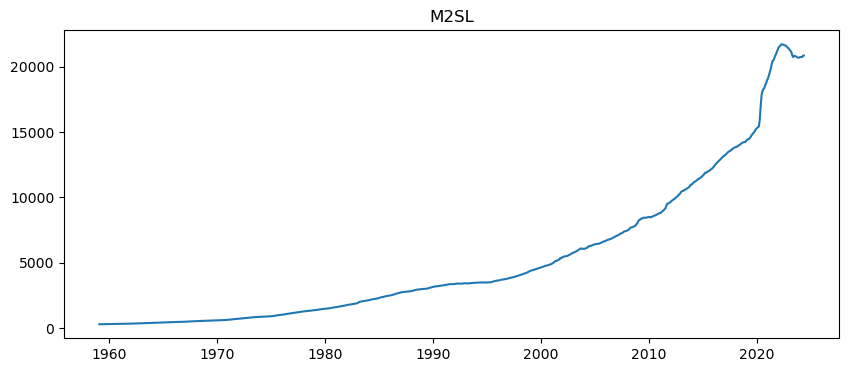

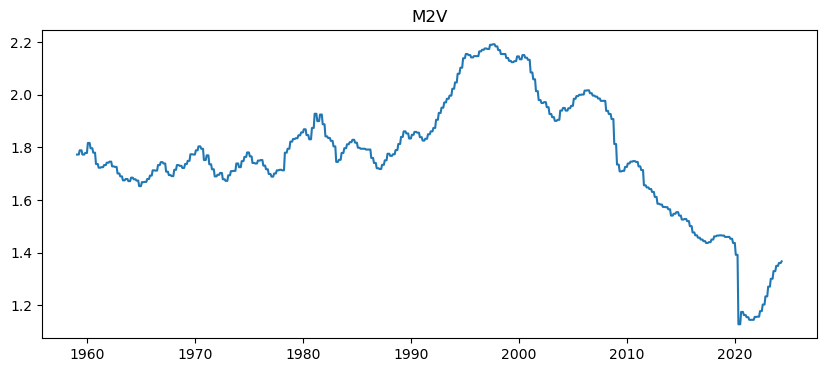

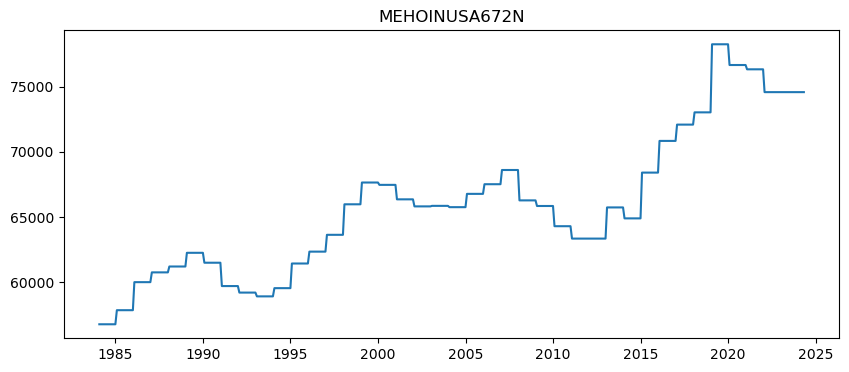

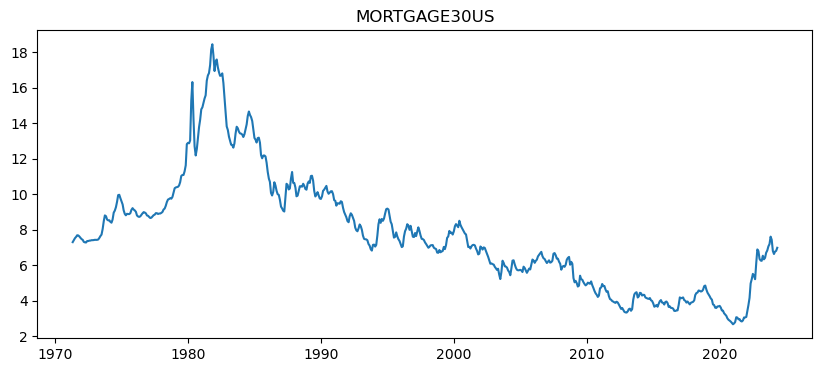

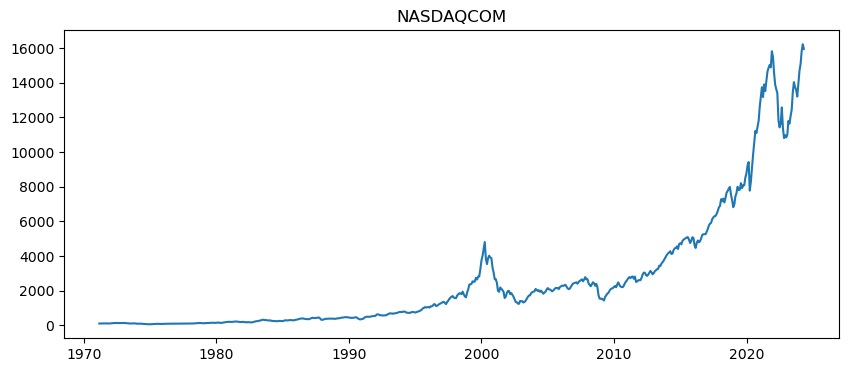

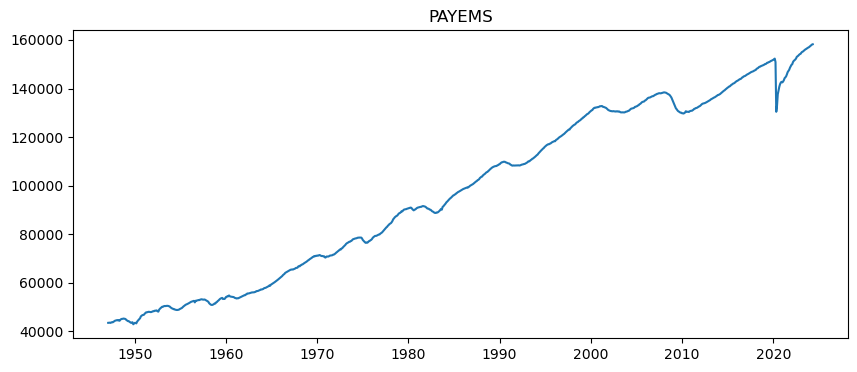

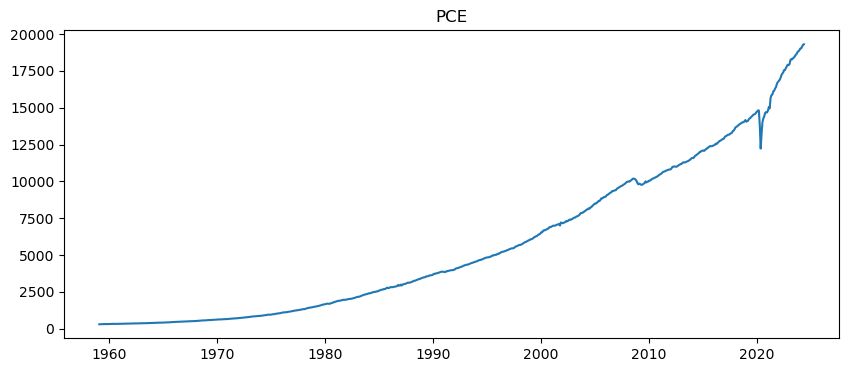

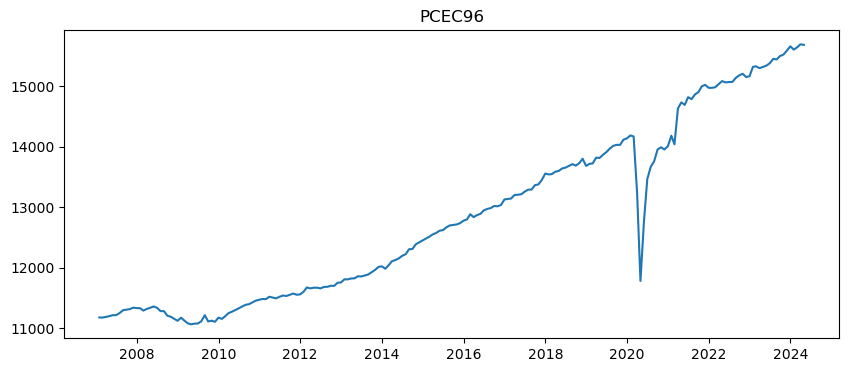

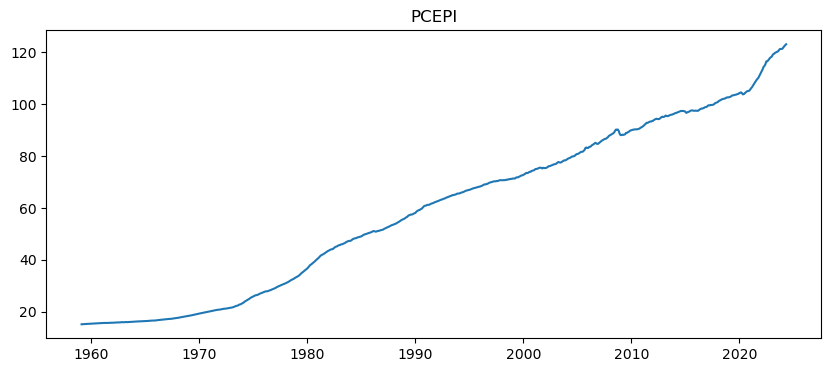

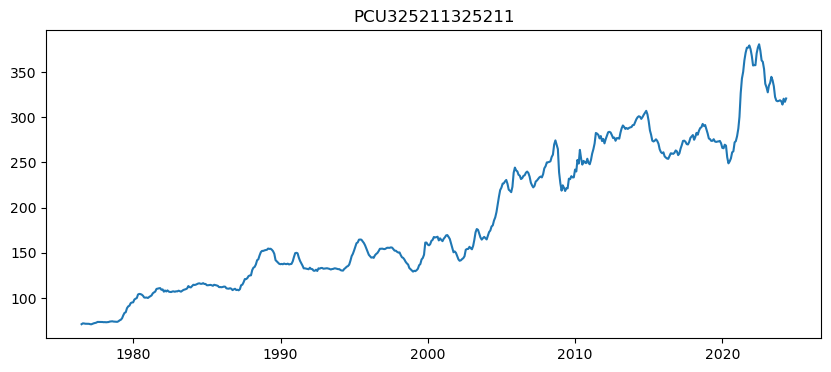

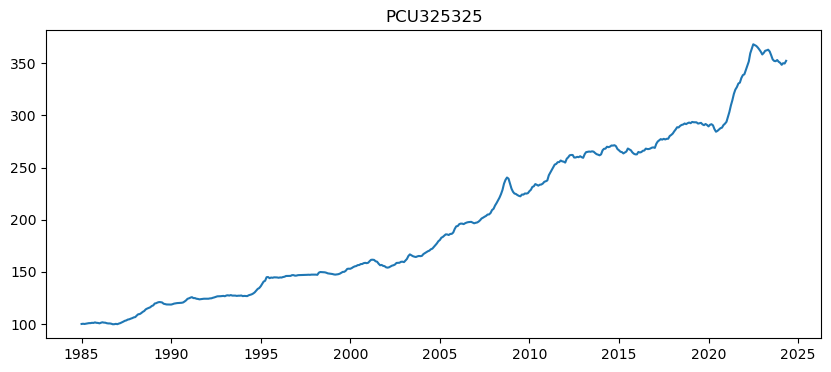

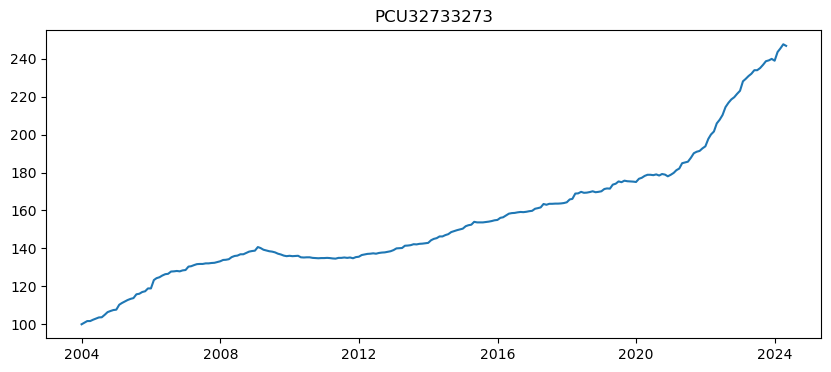

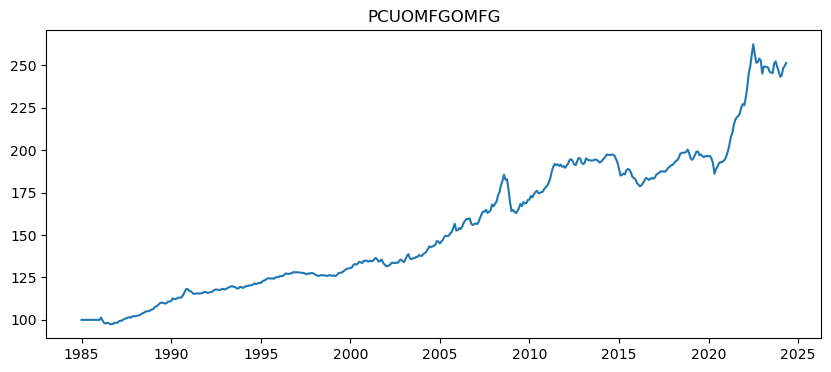

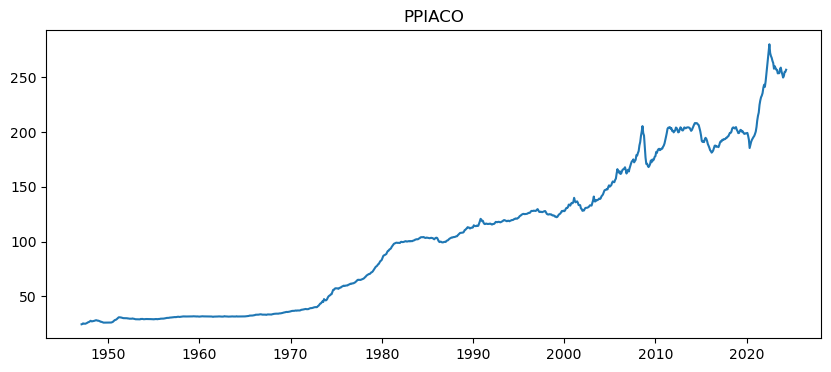

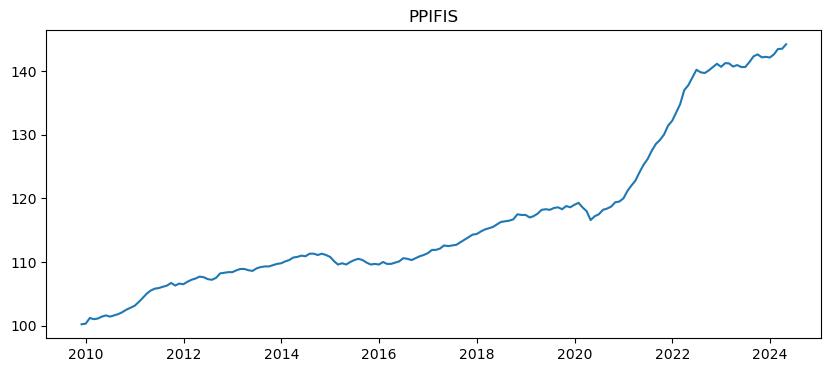

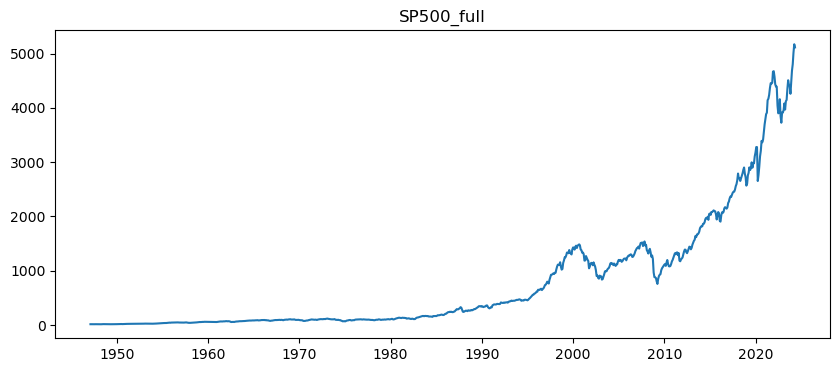

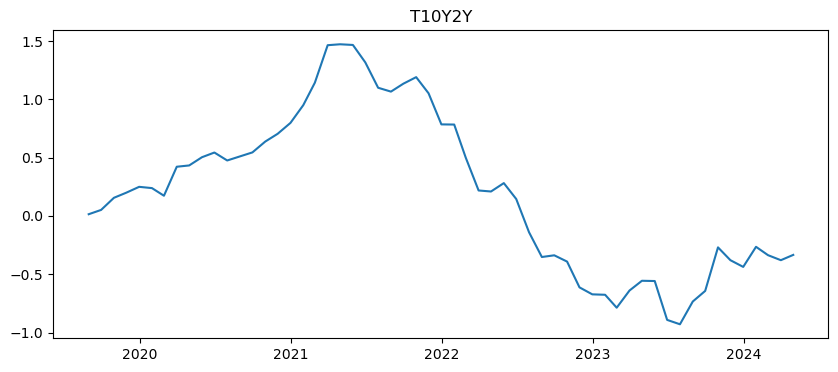

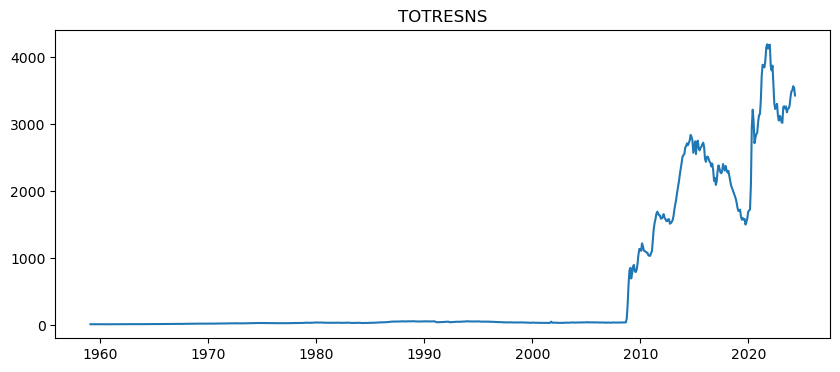

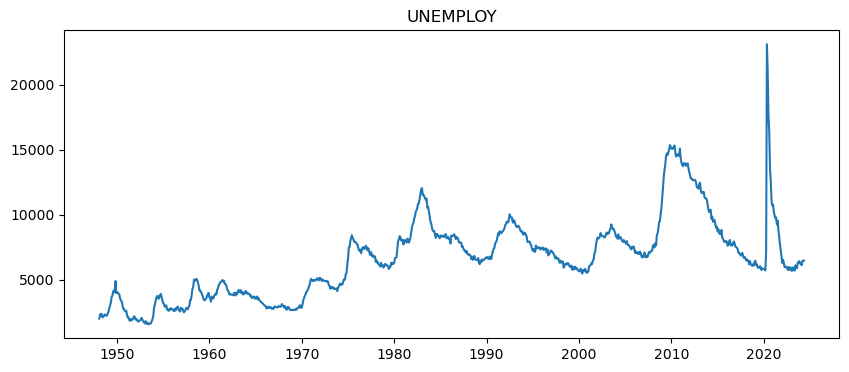

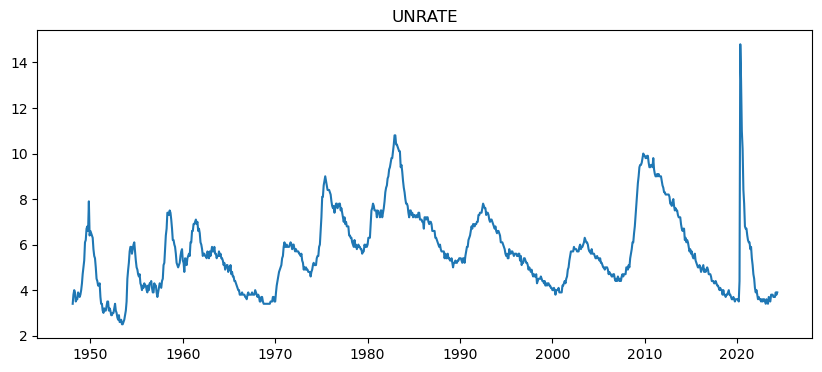

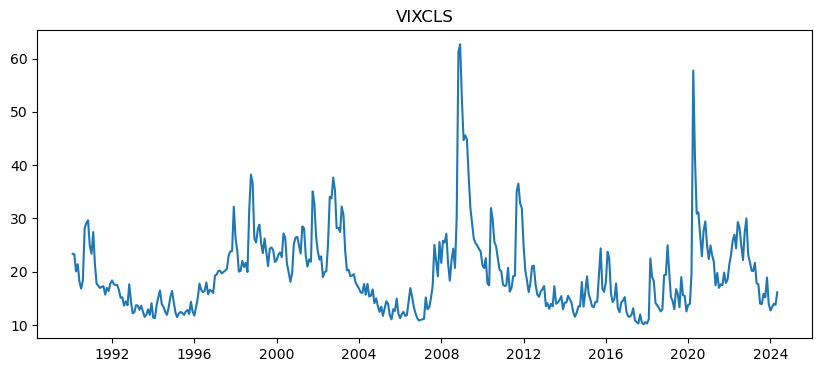

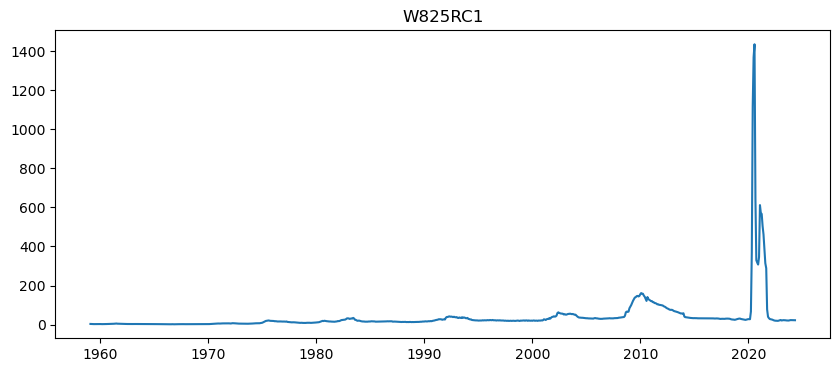

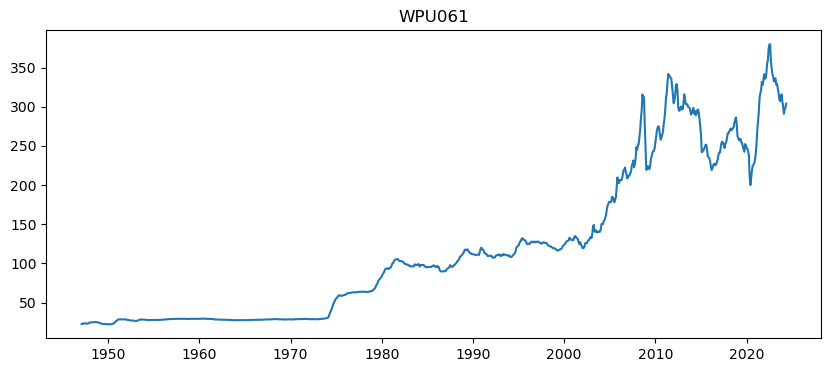

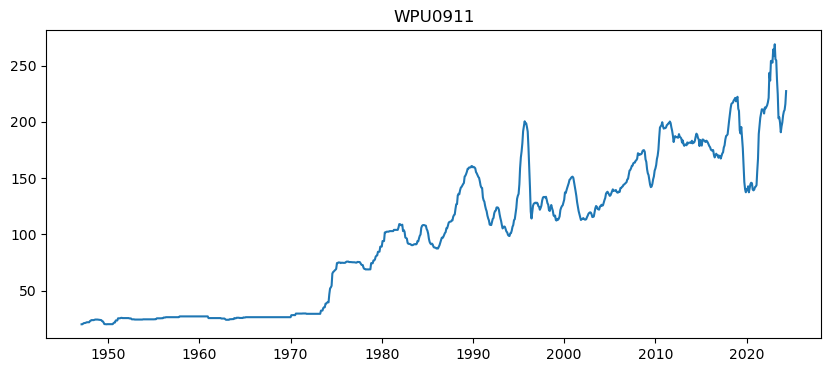

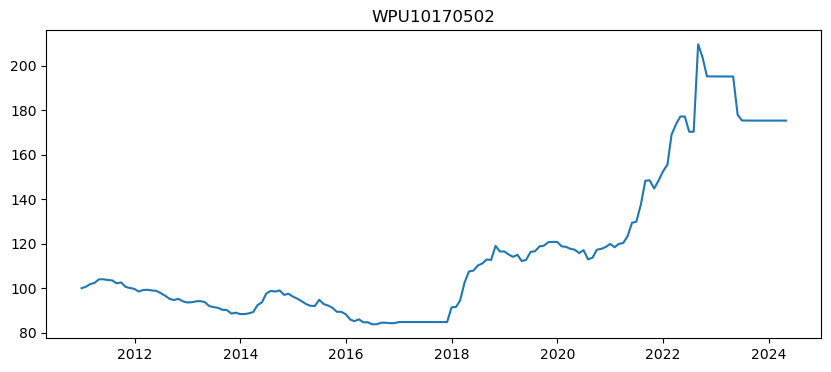

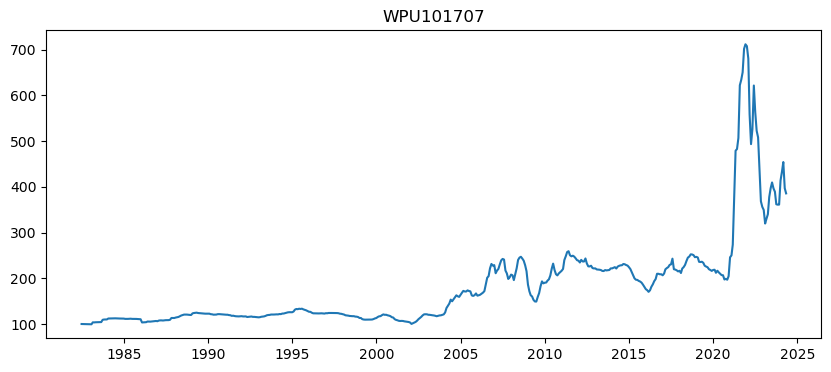

In [6]:
for col in list(df.columns):
    plt.figure(figsize=(10, 4))
    plt.plot(df["DATE"], df[col])
    plt.title(col)
    plt.show();

In [7]:
df

,DATE,A091RC1Q027SBEA,A939RX0Q048SBEA,BOGMBASE,CCSA,CORESTICKM159SFRBATL,CPIAUCSL,CPILFESL,DEXUSEU,DGS10,...,T10Y2Y,TOTRESNS,UNEMPLOY,UNRATE,VIXCLS,W825RC1,WPU061,WPU0911,WPU10170502,WPU101707
0,1947-01-31,5.352,15248.0,NaN,NaN,NaN,21.480,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.500,20.100,NaN,NaN
1,1947-02-28,5.352,15248.0,NaN,NaN,NaN,21.620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.700,20.100,NaN,NaN
2,1947-03-31,5.352,15248.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.000,20.600,NaN,NaN
3,1947-04-30,5.360,15139.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.600,21.100,NaN,NaN
4,1947-05-31,5.360,15139.0,NaN,NaN,NaN,21.950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.300,21.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2023-12-31,1025.796,67513.0,5827400.0,1802400.0,4.554396,308.742,313.209,1.090940,4.020000,...,-0.437000,3492.0,6268.0,3.7,12.718500,22.9,300.512,205.776,175.3,413.808
924,2024-01-31,1059.235,67672.0,5843700.0,1782750.0,4.603922,309.685,314.438,1.089890,4.058095,...,-0.264762,3507.0,6124.0,3.7,13.388636,22.6,290.946,209.264,175.3,433.171
925,2024-02-29,1059.235,67672.0,5896900.0,1797250.0,4.403102,311.054,315.565,1.079300,4.207500,...,-0.336500,3567.7,6458.0,3.9,13.980476,22.8,296.303,210.580,175.3,454.090
926,2024-03-31,1059.235,67672.0,5883000.0,1801400.0,4.509212,312.230,316.698,1.087019,4.208500,...,-0.379500,3543.1,6429.0,3.8,13.787500,22.8,298.280,215.883,175.3,396.888


In [8]:
df.to_csv("../data/interim/economic_dataset.csv", index=False)